#  Telcom churn project

# Situation overview

### We have Telco which is a premier phone, internet, and streaming solutions provider. As with any subscription based services company one of the biggest and consistent headwinds is increasing and maintaining customer persistency (henceforth referred to as customer churn)- and Telco is no different. Being able to determine drivers of churn along with identifying the customer segments most likely to churn is paramount. The lost oppertunity cost associated with a customer subscription cancellation is greater than that of customer retention initiatives, and the acquisition cost of new customers eclipses the retention initiative costs as well.  

# Mission 



#### Provide proper README.md file that details the circumstances, facts, charactaristics of the project.

### Deliver a final report notebook containing only what is material to convey the message along with appropriate markdown cells and code comments so that everything is easily understood

### Present final notebook explaining it entirely and succinctly in alloted time.

### Final notebook contain at least 4 questions in natural language, visualization, statistical test to address hypothesis, and summarization cell that answers the question and a final exploratory summary

### Establish baseline to compare models to.

### Develop 3 different models and evaluate them on the appropriate data subsets when appropriate

### final report will address initial questions, provide meaningful yet doable recommendations, and steps that could be taken to improve.

### Have all work completed and turned in by 1230HRS 23AUG2022.









In [2]:
#these imports allow us to access our functions to acquire and prepare our data.
import acquire 
import prepare
#these imports allow us to work with Dataframes

import numpy as np
import pandas as pd

#this allows us to use some statistical functions

from scipy import stats

#visualization imports
import seaborn as sns
import matplotlib.pyplot as plt


# Acquire data

In [3]:
# function here reads data into a DataFrame

telco_churn=acquire.get_telco_data()

In [121]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   contract_type                          7043 non-null   object 
 1   customer_id                            7043 non-null   object 
 2   gender                                 7043 non-null   object 
 3   senior_citizen                         7043 non-null   int64  
 4   partner                                7043 non-null   object 
 5   dependents                             7043 non-null   object 
 6   tenure                                 7043 non-null   int64  
 7   phone_service                          7043 non-null   object 
 8   multiple_lines                         7043 non-null   object 
 9   online_security                        7043 non-null   object 
 10  online_backup                          7043 non-null   object 
 11  devi

# Acquire brief

-  I wrote my my SQL query into a function called get_telco_data in my acquire.py file. 
-  this function also stores data as csv file on local directory for future use
-  this DataFrame has 7,043 entry rows, and 48 columns.

In [5]:
#here I use the function impored from my perpare.py file to tidy and clean the data

telco_churn=prepare.prep_telco_churn(telco_churn)


In [7]:
# gives me a quick snapshot of data types, size, and number of rows and columns
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   contract_type                          7043 non-null   object 
 1   customer_id                            7043 non-null   object 
 2   gender                                 7043 non-null   object 
 3   senior_citizen                         7043 non-null   int64  
 4   partner                                7043 non-null   object 
 5   dependents                             7043 non-null   object 
 6   tenure                                 7043 non-null   int64  
 7   phone_service                          7043 non-null   object 
 8   multiple_lines                         7043 non-null   object 
 9   online_security                        7043 non-null   object 
 10  online_backup                          7043 non-null   object 
 11  devi

In [8]:
# here I am confirming that there are no nulls in the data

telco_churn.isnull().sum()

contract_type                            0
customer_id                              0
gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
internet_service_type                    0
payment_type                             0
gender_encoded                           0
partner_encoded                          0
dependents_

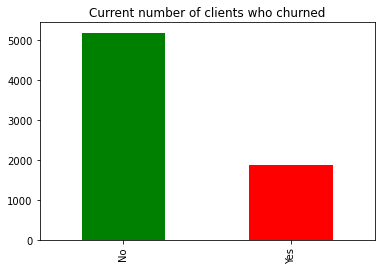

In [129]:
# create a bar plot to show the number of churn versus no churn customers


telco_churn.churn.value_counts().plot.bar(color=['green','red'])
plt.legend

plt.title('Current number of clients who churned')
plt.show()

In [9]:
# calling my function from my prepare.py file to split my data into three subsets for modeling purposes. 

train, validate, test= prepare.my_train_test_split(telco_churn,'churn')

In [10]:
# demonstrating that the size for each of my data subsets are correct in relationship to one another

train.shape,validate.shape,test.shape

((4225, 48), (1409, 48), (1409, 48))

# Prepare brief

- First thing I used my prep_telco_churn function imported from my prepare.py file to clean and tidy the data up

- Multiple columns that were redundant were dropped, columns were also added that have encoded data to allow the DataFrame to be fed into models.

- As can see above checked for and confirmed there are no null values to worry about.

- Quick visual look at our target variable shows that the amount of churn is around a third the size of the no churn.

- I split my data into 3 subsets - train, validate test (60/20/20 ratio) stratifying on churn column.


# Explore data

## Does contract type have a significant relationship with customer churn?

In [153]:
# creating a crosstabulaion so that  I a can feed it into my bar plot

contract_and_churn= pd.crosstab(train.contract_type,train.churn)
contract_and_churn

churn,No,Yes
contract_type,,
Month-to-month,1327,990
One year,815,98
Two year,962,33


<Figure size 576x1008 with 0 Axes>

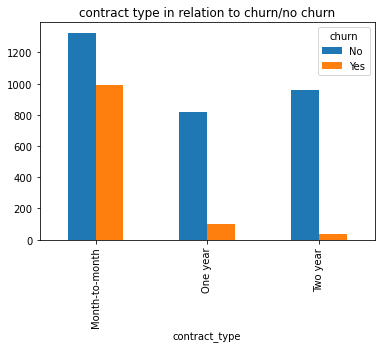

In [159]:
#creating bar plot to show the side by side comparision of churn in respect to contract type
contract_and_churn.plot.bar()
plt.title("contract type in relation to churn/no churn")

plt.show()

### Just by looking at this visual comparison we can clearly observe an exponential delta in churn rate based on contract type.


# 1) Is there a internet service type associated with churn more than expected?


Text(0.5, 1.0, 'fiber optic customers seem to churn more')

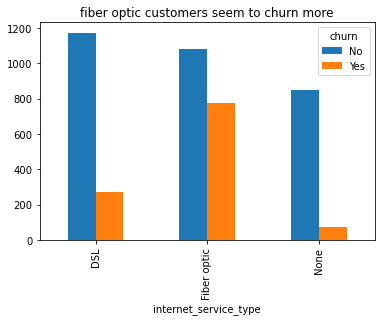

In [11]:
# created a crosstab in order to create a bar plot from it
observed_ist=pd.crosstab(train.internet_service_type, train.churn)

# bar plot demonstrating the number of occurances of churn and no churn on the basis of internet service type
observed_ist.plot.bar()

plt.title('fiber optic customers seem to churn more')

## graph conclusions

- looking at the distribution of different service types bifurcated between those who have and have not churned we can see large disparities amongst all three.
- this warrants further investigation and statistical investigation which we will do below

### H_0= there is no difference in churn rates between internet service types

### H_a= some internet service types churn more often than other service types

### alpha         = .05

In [13]:

#here I am using this function to calculate the Chi^2 p value, degrees of freedom, and expected values then saving them each individually to a corresponding variable
chi2_ist,p_ist,degf_ist,expected_ist = stats.chi2_contingency(observed_ist)

In [134]:
# chi^2 value

print('chi2 is',chi2_ist)



chi2 is 423.25897064244805


In [15]:
#p-value

p_ist

1.2316358365835844e-92

In [16]:
# expected value outpou

expected_ist

array([[1063.07408284,  383.92591716],
       [1362.82130178,  492.17869822],
       [ 678.10461538,  244.89538462]])

In [17]:
alpha = .05

In [148]:
if p_ist < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


# Conclusion and takeaway 

- is we reject H_0 and conclude there is a statistcally significant relationship between internet service type and churn. 

- below we will look at each of the 3 possible types individually and statistically test them in relation to churn so we can further specify. explanation below. 

#### each one of the three internet service types in above chart need to be split and isolated to perform chi^2 test on. Our initial hypothesis testing only evaluates the relationship between internet service column as a whole and not each option individually.

In [135]:
#here i carve out a duplicate dataframe to put dummy variables in for the internet service type. I tried to run a boolean == dsl for example and it only showed false outcomes which is insufficient 

i_s_t_db=train

i_s_b_dummy=pd.get_dummies(i_s_t_db.internet_service_type,)

In [21]:
# DataFrame created in above cell used to answer this quetion 

i_s_b_dummy

,DSL,Fiber optic,None
5911,1,0,0
2479,0,0,1
5889,1,0,0
6087,1,0,0
785,0,1,0
...,...,...,...
6102,0,1,0
356,1,0,0
1756,0,1,0
2127,1,0,0


In [22]:
#adding thee churn values to the DataFrame so that the DataFrame can be used for statistical testing
df_dummies=pd.concat((i_s_b_dummy,i_s_t_db.churn),axis=1)


# this is isolating and evaluation of DSL feature

### H_0= there is no relationship between DSL internet service and churn

### H_a= DSL internet service type has a statistically significant relation ship to customer churn

### alpha         = .05


In [24]:
#creating crosstab to evaluate DSL customers and if they did or did not churn

observed_dsl=pd.crosstab(df_dummies.DSL,df_dummies.churn)

In [25]:
observed_dsl

churn,No,Yes
DSL,,
0,1931,847
1,1173,274


In [26]:
#here I am using this function to calculate the Chi^2 p value, degrees of freedom, and expected values then saving them each individually to a corresponding variable (each outputted in cells below)

chi2_dsl,p_dsl,degf_dsl, expected_dsl= stats.chi2_contingency(observed_dsl)

In [27]:
#chi^2 value

chi2_dsl

64.5642979302063

In [28]:
#p-value

p_dsl

9.343307371729716e-16

In [136]:
#expected value

expected_dsl= expected_dsl.round()
expected_dsl

array([[2041.,  737.],
       [1063.,  384.]])

# conclusion and takeaway 

- we reject the null hypothesis and there is a significant relationship bewtween DSL customers and churn

- DSL customer status is a useful feature

# this is isolating and evaluating fiber optic feature


### H_0= there is no relationship between fiber optic internet service and churn

### H_a= fiber optic internet service type has a statistically significant relation ship to customer churn

In [30]:

# crosstab created to evaluate fiber optic custoers who churned or no churn
observed_fiber_optic=pd.crosstab(df_dummies['Fiber optic'] ,df_dummies.churn)


In [31]:
observed_fiber_optic

churn,No,Yes
Fiber optic,,
0,2022,348
1,1082,773


In [32]:
#here I am using this function to calculate the Chi^2 p value, degrees of freedom, and expected values then saving them each individually to a corresponding variable

chi2_fiber_optic,p_fiber_optic,degf_fiber_optic, expected_fiber_optic= stats.chi2_contingency(observed_fiber_optic)

In [33]:
# chi^2 value

chi2_fiber_optic

387.4117221686711

In [34]:
#p-value


p_fiber_optic

3.0293763443640615e-86

In [137]:

#expected values

expected_fiber_optic=expected_fiber_optic.round()
expected_fiber_optic

array([[1741.,  629.],
       [1363.,  492.]])

# Conclusion and takeaway

- We reject the null hypothesis and conclude there is a significant relationship between fiber optic customers and churn.

- fiber optic customer status is a useful feature.

# this is islolating and evaluating the "none" catagory 

### H_0= there is no relationship between "none" internet service and churn

### H_a= "none" internet service type has a statistically significant relation ship to customer churn

In [36]:
#crosstab created to evaluate customers with no internet service and if they churn or not

observed_none=pd.crosstab(df_dummies['None'] ,df_dummies.churn)


In [37]:
observed_none

churn,No,Yes
None,,
0,2255,1047
1,849,74


In [38]:
#here I am using this function to calculate the Chi^2 p value, degrees of freedom, and expected values then saving them each individually to a corresponding variable

chi2_none,p_none,degf_none, expected_none= stats.chi2_contingency(observed_none)

In [39]:
#chi^2 value

chi2_none

206.48556625572866

In [40]:
# p-value

p_none

8.028710753333225e-47

In [139]:
# expected values

expected_none=expected_none.round()
expected_none

array([[2426.,  876.],
       [ 678.,  245.]])

# Conclusion and takeaways

- we reject the null hypothesis and conclude there is a significant relationship between customers with no internet service and churn

- customers who have no internet service plan is a useful feature.

# summary of all three in single DataFrame for comparison 

In [140]:
#created a dictionary to be able to summarize all three internet service options on one spot

summary_dict= {
    'DSL' : [chi2_dsl,p_dsl,degf_dsl, expected_dsl],
    'fiber_optic' : [chi2_fiber_optic,p_fiber_optic,degf_fiber_optic, expected_fiber_optic],
    'none' : [chi2_none,p_none,degf_none, expected_none],
}


# created a DataFrame from dictionary and labeled the index to output a clean visual
summary_df=pd.DataFrame(summary_dict)

summary_df.index = ['chi^2', 'p_value','degrees_freedom','expected']
summary_df

,DSL,fiber_optic,none
chi^2,64.564298,387.411722,206.485566
p_value,0.0,0.0,0.0
degrees_freedom,1,1,1
expected,"[[2041.0, 737.0], [1063.0, 384.0]]","[[1741.0, 629.0], [1363.0, 492.0]]","[[2426.0, 876.0], [678.0, 245.0]]"


# question  conclusion and takeaways

- looking at this comparision we can say that customers who have fiber optic service have the strongest relationship to churn, followed by "none" and DSL

- after seeing these results I concluded each one of these will be used for modeling purposes

#  Do customers who churn have a higher average monthly service cost that those who do not?

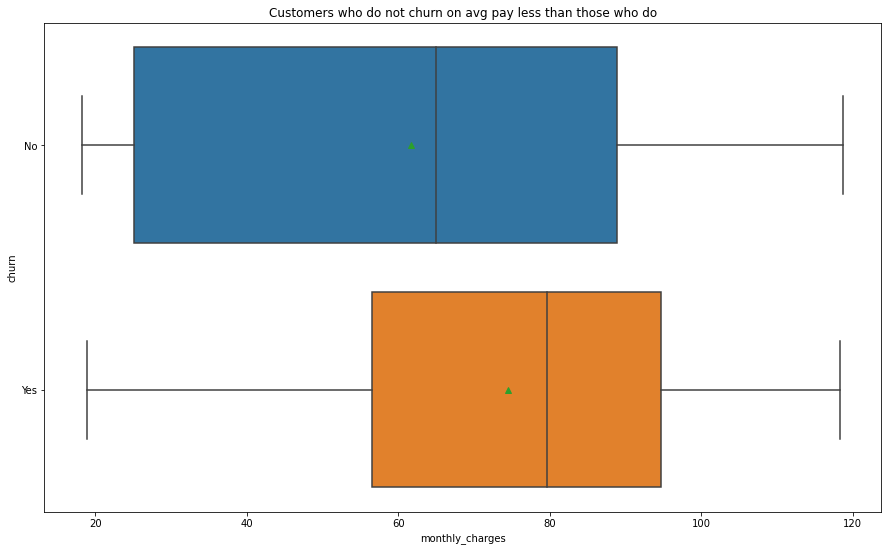

In [142]:
# boxplot created to demonstate the relationship of avearage monthly charges of customers who churn to average customer charges of those who do not churn



plt.figure(figsize=(15,9)) 
sns.boxplot(y='churn', x='monthly_charges', data=train, showmeans=True)
plt.title('Customers who do not churn on avg pay less than those who do')
plt.show()



### H_0= Mean of monthly charges of churned customers <= Mean of monthly charges of customers who haven't churned

### H_a= there is a significant relationship bewteen higher average monthly payment and higher customer churn

In [46]:
#calculating the averages of mo. charges of churn and no churn customers

train.groupby('churn')['monthly_charges'].mean()

churn
No     61.628334
Yes    74.547591
Name: monthly_charges, dtype: float64

Text(0.5, 1.0, 'number of churn customers and their monthly charges')

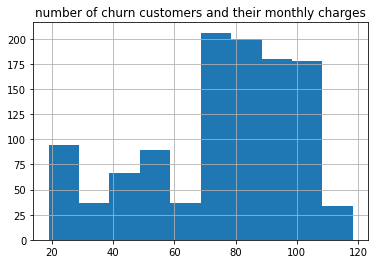

In [145]:
#saving the segment of those who churn into a variable and plotting a bar plot of it

churn_sample = train[train.churn == 'Yes'].monthly_charges

churn_sample.hist()

plt.title('number of churn customers and their monthly charges')


Text(0.5, 1.0, 'number of no churn customers and their monthly charges')

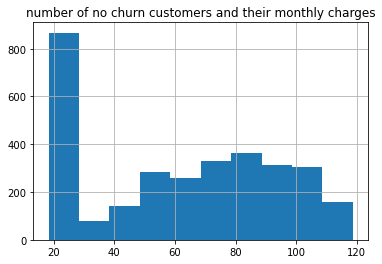

In [144]:
#saving the segment of those who did not churn into a variable and plotting a bar plot of it

no_churn_sample = train[train.churn == 'No'].monthly_charges

no_churn_sample.hist()

plt.title('number of no churn customers and their monthly charges')


In [49]:
#perfomring independent t test and saving the resulting t value and p value in their respective values seen in the two cells below

t,p=stats.ttest_ind(churn_sample,no_churn_sample,equal_var=True)

In [50]:
t


12.470933594920119

In [51]:
p

4.430821858383039e-35

In [52]:
# confirming that the variances of the two are the same which they are not 

print(churn_sample.var())
print(no_churn_sample.var())


630.7938558007844
975.186099094063


had to re do the ttest function and set the equal variance to false

In [53]:
# redoing the steps above for same t test except with unequal variances 

t,p=stats.ttest_ind(churn_sample,no_churn_sample,equal_var=False)

In [54]:
t

13.796475652581572

In [55]:
p

9.41633723579986e-42

# Question conclusion and takeaways

- we reject the null hypothesis and conclude there is a significant relationship between higher average monthly payment and churn

- monthly charges is a useful feature 

- after reviewing this it appears higher monthly cost is a driver for churn

# Does any method of payment have a positive relationship with customer churn?

In [57]:
#creating a crosstab to evaluate payment types vs churn

observed_pmt_type=pd.crosstab(train.payment_type,train.churn)
observed_pmt_type

churn,No,Yes
payment_type,,
Bank transfer (automatic),789,144
Credit card (automatic),774,145
Electronic check,780,643
Mailed check,761,189


Text(0.5, 1.0, 'Payment types compaed by customers who churn/no churn')

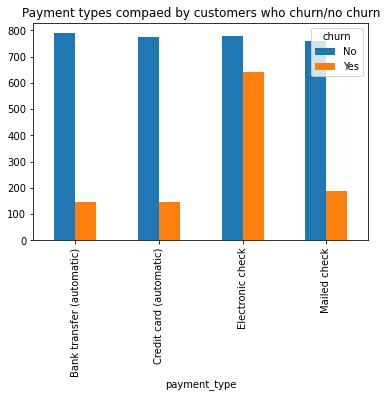

In [149]:
# creating a bar chart comparing payment types on the basis of churn vs no churn

observed_pmt_type.plot.bar()
plt.title('Payment types compaed by customers who churn/no churn')

# H_0 there is no relationshnip and payment type is independennt of customer churn

# H_a  there is a relationship bewteen electronic check payment method and customer churn

In [59]:
# creating a crosstab to evaluate electronic check payment customers in relation to their churn status

observed_e_check=pd.crosstab(train['payment_type_Electronic check'], train.churn)

In [60]:
observed_e_check

churn,No,Yes
payment_type_Electronic check,,
0,2324,478
1,780,643


In [61]:
#here I am using this function to calculate the Chi^2 p value, degrees of freedom, and expected values then saving them each individually to a corresponding variable

chi2_e_check,p_e_check,degf_e_check,expected_e_check = stats.chi2_contingency(observed_e_check)

In [62]:
#chi^2 value

chi2_e_check

381.57600369890343

In [63]:

#p-value

p_e_check

5.647318991682941e-85

In [64]:
#degrees of freedom

degf_e_check

1

In [65]:
#expected values

expected_e_check

array([[2058.55810651,  743.44189349],
       [1045.44189349,  377.55810651]])

In [66]:
# summary print statement showing the results of the tests above all in one place

print('Observed\n')
print(observed_e_check)
print('---\nExpected\n')
print(expected_e_check)
print('---\n')
print(f'chi^2 = {chi2_e_check:.4f}')
print(f'p     = {p_e_check:.4f}')

Observed

churn                            No  Yes
payment_type_Electronic check           
0                              2324  478
1                               780  643
---
Expected

[[2058.55810651  743.44189349]
 [1045.44189349  377.55810651]]
---

chi^2 = 381.5760
p     = 0.0000


# Question conclusion and takeaways

- we reject the null hypothesis and conclude there is a statistically significant relationship between paying by electronic check and churn

- electronic check seems to have the highest predication to churn

- electronic check payment status is a useful feature

# Exploratory analysis brief

- After exploration of the data and answering my questions above I decided to use internet service types, monthly charges, and payment and contract types to use as my key features when moving forward constructing my models.
Each and every one of the features I mentioned I substantiated through apropiate statistical testing methods. When evaluating the different internet service subscripions ( or lack thereof), payment types, and average monthly charges each statistcal test yielded an almost perfectly zero p- value. what this means in lay terms that the results are almost impossible to be due to chance, but rather confirmed the relationships of the features as being driver of churn. Based on what I learned I am therefore removing any features that I was not able to show a relationship to churn to reduce "noise", possible redundancies or confounding variables.

# Baseline Accuracy

- 73.46% of the customers are catagorized as no churn. Therefore if I predict every time that the customer will not churn I will get it right 73.46% of the time

In [67]:
#calcuating the mode

train.churn.value_counts()

No     3104
Yes    1121
Name: churn, dtype: int64

In [68]:
baseline=((train.churn=='No').sum())/len(train.churn)

In [69]:
baseline=baseline * 100
baseline

73.46745562130178

### My baseline accuracy is 73.46%

In [71]:
# Define y train, val, and test datasets. (Target variable is churn)

X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [72]:
#these are the features from the data that I will feed into my models

features=['payment_type_Mailed check', 'payment_type_Electronic check','payment_type_Credit card (automatic)','internet_service_type_Fiber optic','internet_service_type_None','contract_type_One year','contract_type_Two year','monthly_charges']

## MVP models

- I am going with random forest, K nearest neighbors, and Logistic regression model classifiers

- I am using the features listed in the cell above for each model.




# random forest model

In [73]:
#imports needed in order to run the models

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [74]:
#creatnig model
rf=RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [75]:
# fitting model

rf.fit(X_train[features],y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [76]:
print(rf.feature_importances_)

[0.00339132 0.19651786 0.01709515 0.21274578 0.08418274 0.12503557
 0.23640915 0.12462243]


In [77]:
y_pred_rf= rf.predict(X_train[features])

In [78]:
y_pred_proba_rf=rf.predict_proba(X_train[features])

In [79]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train[features], y_train)))


Accuracy of random forest classifier on training set: 0.77


In [80]:
print(confusion_matrix(y_train, y_pred_rf))


[[2847  257]
 [ 695  426]]


In [81]:
print(classification_report(y_train, y_pred_rf))


              precision    recall  f1-score   support

          No       0.80      0.92      0.86      3104
         Yes       0.62      0.38      0.47      1121

    accuracy                           0.77      4225
   macro avg       0.71      0.65      0.66      4225
weighted avg       0.76      0.77      0.75      4225



# logistic regression model


In [82]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=123)


In [84]:

logit.fit(X_train[features], y_train)


LogisticRegression(random_state=123)

In [85]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)


Coefficient: 
 [[ 0.30385884  0.70568176  0.05288249  1.27258726 -1.05701566 -1.40978345
  -2.32782842 -0.01156295]]
Intercept: 
 [-0.54218126]


In [86]:
y_pred_lr = logit.predict(X_train[features])


In [87]:
y_pred_proba_lr = logit.predict_proba(X_train[features])


In [88]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))


Accuracy of Logistic Regression classifier on training set: 0.77


In [89]:
print(confusion_matrix(y_train, y_pred_lr))


[[2751  353]
 [ 608  513]]


In [90]:
print(classification_report(y_train, y_pred_lr))


              precision    recall  f1-score   support

          No       0.82      0.89      0.85      3104
         Yes       0.59      0.46      0.52      1121

    accuracy                           0.77      4225
   macro avg       0.71      0.67      0.68      4225
weighted avg       0.76      0.77      0.76      4225



# K nearest neighbors model

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:

knn = KNeighborsClassifier(n_neighbors=8, weights='uniform')


In [93]:
knn.fit(X_train[features], y_train)


KNeighborsClassifier(n_neighbors=8)

In [94]:
y_pred_knn = knn.predict(X_train[features])


In [95]:
y_pred_proba_knn = knn.predict_proba(X_train[features])


In [96]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train[features], y_train)))


Accuracy of KNN classifier on training set: 0.80


In [97]:
print(confusion_matrix(y_train, y_pred_knn))


[[2907  197]
 [ 650  471]]


In [98]:
print(classification_report(y_train, y_pred_knn))


              precision    recall  f1-score   support

          No       0.82      0.94      0.87      3104
         Yes       0.71      0.42      0.53      1121

    accuracy                           0.80      4225
   macro avg       0.76      0.68      0.70      4225
weighted avg       0.79      0.80      0.78      4225



MVP

# Evaluate 3 models on out of sample data

# random forest model train vs validate

In [99]:
# have to do a new y prediction for my validate sample in order to create a classification report

y_pred_rf_validate = rf.predict(X_validate[features])

In [100]:
# print statemnt showcasing outputs all in one spot

print(classification_report(y_train, y_pred_rf))



print('Accuracy of baseline model is: {:.2f}%'
     .format(baseline))


print(classification_report(y_validate, y_pred_rf_validate))

              precision    recall  f1-score   support

          No       0.80      0.92      0.86      3104
         Yes       0.62      0.38      0.47      1121

    accuracy                           0.77      4225
   macro avg       0.71      0.65      0.66      4225
weighted avg       0.76      0.77      0.75      4225

Accuracy of baseline model is: 73.47%
              precision    recall  f1-score   support

          No       0.80      0.91      0.85      1035
         Yes       0.59      0.36      0.45       374

    accuracy                           0.76      1409
   macro avg       0.69      0.64      0.65      1409
weighted avg       0.74      0.76      0.74      1409



In [101]:
# print statemnt showcasing outputs all in one spot

print('Accuracy of baseline model is: {:.2f}%'
     .format(baseline))



print('Accuracy of random forest classifier on train set: {:.2f}'
     .format(rf.score(X_train[features], y_train)))



print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate[features], y_validate)))


Accuracy of baseline model is: 73.47%
Accuracy of random forest classifier on train set: 0.77
Accuracy of random forest classifier on validate set: 0.76



# Logistic Regression model train vs validate

In [102]:
# have to do a new y prediction for my validate sample in order to create a classification report

y_pred_lr_validate = logit.predict(X_validate[features])

In [103]:
print(classification_report(y_train, y_pred_lr))

print('Accuracy of baseline model is: {:.2f}%'
     .format(baseline))

print(classification_report(y_validate, y_pred_lr_validate))

              precision    recall  f1-score   support

          No       0.82      0.89      0.85      3104
         Yes       0.59      0.46      0.52      1121

    accuracy                           0.77      4225
   macro avg       0.71      0.67      0.68      4225
weighted avg       0.76      0.77      0.76      4225

Accuracy of baseline model is: 73.47%
              precision    recall  f1-score   support

          No       0.82      0.88      0.85      1035
         Yes       0.58      0.45      0.51       374

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.75      0.77      0.76      1409



In [104]:

print('Accuracy of baseline model is: {:.2f}%'
     .format(baseline))



print('Accuracy of logistic regression classifier on train set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))



print('Accuracy of logistic regression classifier on validate set: {:.2f}'
     .format(logit.score(X_validate[features], y_validate)))


Accuracy of baseline model is: 73.47%
Accuracy of logistic regression classifier on train set: 0.77
Accuracy of logistic regression classifier on validate set: 0.77


# K nearest neighbors model train vs validate

In [105]:
# have to do a new y prediction for my validate sample in order to create a classification report

y_pred_knn_validate = knn.predict(X_validate[features])

In [106]:
# print statemnt showcasing outputs all in one spot

print(classification_report(y_train, y_pred_knn))

print('Accuracy of baseline model is: {:.2f}%'
     .format(baseline))

print(classification_report(y_validate, y_pred_knn_validate))

              precision    recall  f1-score   support

          No       0.82      0.94      0.87      3104
         Yes       0.71      0.42      0.53      1121

    accuracy                           0.80      4225
   macro avg       0.76      0.68      0.70      4225
weighted avg       0.79      0.80      0.78      4225

Accuracy of baseline model is: 73.47%
              precision    recall  f1-score   support

          No       0.79      0.89      0.84      1035
         Yes       0.55      0.36      0.44       374

    accuracy                           0.75      1409
   macro avg       0.67      0.63      0.64      1409
weighted avg       0.73      0.75      0.73      1409



In [107]:

print('Accuracy of baseline model is: {:.2f}%'
     .format(baseline))



print('Accuracy of KNN classifier on train set: {:.2f}'
     .format(knn.score(X_train[features], y_train)))


print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate[features], y_validate)))


Accuracy of baseline model is: 73.47%
Accuracy of KNN classifier on train set: 0.80
Accuracy of KNN classifier on validate set: 0.75


# MVP Models summary and  evaluation metrics for best model

## As with most I started with the baseline accuracy comparison (73.47%) and compared and initially KNN stood out with .80 while the other two models were .77. once  I took my top 3 and ran them on validate data set the KNN dropped to .75 and the other two practially stayed in exact same spot. The disparity in train vs validate for KNN made me shy away from selecting it due to overfitting concerns. Due to the nature of the problem we are trying to solve with Telco data recall score is the most important and I went on to use it as a tie breaker. Logistic regression model not only had a significantly higher recall, but there was no change from train to validate recall either.  this confirmed my decision to move forward to test data set with my logistic regression model.

In [108]:
# have to do a new y prediction for my validate sample in order to create a classification report

y_pred_lr_test = logit.predict(X_test[features])

In [150]:
# print statemnt showcasing outputs all in one spot

print('Accuracy of baseline model is: {:.2f}%'
     .format(baseline))



print('Accuracy of logistic regression classifier on train set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))



print('Accuracy of logistic regression classifier on validate set: {:.2f}'
     .format(logit.score(X_validate[features], y_validate)))



print('Accuracy of logistic regression classifier on validate set: {:.2f}'
     .format(logit.score(X_test[features], y_test)))

Accuracy of baseline model is: 73.47%
Accuracy of logistic regression classifier on train set: 0.77
Accuracy of logistic regression classifier on validate set: 0.77
Accuracy of logistic regression classifier on validate set: 0.78


In [110]:
print('Accuracy of baseline model is: {:.2f}%'
     .format(baseline))


print(classification_report(y_train, y_pred_lr))



print(classification_report(y_validate, y_pred_lr_validate))




print(classification_report(y_test, y_pred_lr_test))



Accuracy of baseline model is: 73.47%
              precision    recall  f1-score   support

          No       0.82      0.89      0.85      3104
         Yes       0.59      0.46      0.52      1121

    accuracy                           0.77      4225
   macro avg       0.71      0.67      0.68      4225
weighted avg       0.76      0.77      0.76      4225

              precision    recall  f1-score   support

          No       0.82      0.88      0.85      1035
         Yes       0.58      0.45      0.51       374

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.75      0.77      0.76      1409

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1035
         Yes       0.61      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78   

# Top model on test data conclusion

- my top model actually improved both accuracy and recall on the test set of data. 

- my best model had the least variance between all data sets



# predictions CSV

- columns contain probability of class, prediction of churn (1=churn, 0=not_churn)

In [111]:
# getting the values needed to concat for CSV

y_pred_proba_lr_test= logit.predict_proba(X_test[features])

In [160]:
# getting more values for predictions csv

final_test_y_pred=y_pred_proba_lr_test_df[1]
final_test_y_pred


0       0.186073
1       0.024340
2       0.580656
3       0.553840
4       0.600781
          ...   
1404    0.327413
1405    0.317183
1406    0.014442
1407    0.036887
1408    0.639702
Name: 1, Length: 1409, dtype: float64

In [114]:
#reading into a DataFrame

y_pred_lr_test_df=pd.DataFrame(y_pred_lr_test)

In [115]:
#changing yes and no values to 1 and 0 respectively 

y_pred_final_test=y_pred_lr_test_df.replace('Yes',1).replace('No',0)
y_pred_final_test

,0
0,0
1,0
2,1
3,1
4,1
...,...
1404,0
1405,0
1406,0
1407,0


In [116]:
#concat it all together
X_test1=X_test[['customer_id']].reset_index().drop(columns='index')

final_output=pd.concat([X_test1['customer_id'],final_test_y_pred, y_pred_final_test],ignore_index=True, axis=1)




In [117]:
#adding proper names to columns
final_output.columns=['customer_id','churn_probability','churn_prediction']

In [147]:
final_output.head()

,customer_id,churn_probability,churn_prediction
0,4531-AUZNK,0.186073,0
1,2296-DKZFP,0.024340,0
2,9692-TUSXH,0.580656,1
3,5129-JLPIS,0.553840,1
4,1273-MTETI,0.600781,1


In [119]:
#save predicions in csv in local directory
predictions_final=final_output.to_csv('predictions')

# conclusions
## summary
- We started with a few intuitive basic questions to approach this project is there a relationship between contract type and churn, is there a service associated with churn more than expected, do customers who churn have a higher average monthly service cost that those who do not, and does any method of payment have a positive relationship with customer churn? We visually and statistically demonstranted that it was a resounding yes to all.

- Fiber optic customers,monthly contract customers, electronic check payment customers are the highest drivers for churn. Monthly charges also we determined that those who churn on average pay significantly more.

- I was able to combine these features and create my best model a logarithmic regression classifier with a .78 accuracy and .49 recall. Due to the nature of importance of identifying those who churn recall is very important

- my model is almost exactly the same across all data sets so I expect a consistent performance from it on other outsde data.



## recommendations

- Any discount to fiber optic customers is a temporary band-aid for a problem we do not yet know. I recommend surveying these customers and offering a one time discount on their next bill for their time.  Respondents can then point us to the paint points they are having.

- I recommend going forward all payments are set up via auto-pay and an incentive structure is pushed out to convince current customers to switch to automatic payments.

- I recommend to provide an 6 month contract with auto-pay only option that is set to auto renew at expiraton.




## Next steps

- The electronic check issue I would like to evaluate to see if this a commonality only amongst the senior citizen population. 

- I would like to take more time to ake my models and adjust the hyperparemeters

- adding more features that I proved to be statistically significant drivers of churn
